In [1]:
# tutte le importazioni
import numpy as np
import math
import sympy as sym
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#Il comando successivo permette di interagire con i grafici 3D, ruotare la vista


## Esercitazione 7 -  9 Aprile 2024

Scrivere la function `NewtonRaphson_corde.py`, che implementa il metodo di Newton-Raphson con la variante delle corde
per il calcolo della soluzione di un sistema di equazioni non lineari. 

    Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo Jacobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.

In [17]:
def NewtonRaphson_corde(fname, JacNam, X0, tolx, tolf, NMAX):
    
    matjac = JacNam(X0)
    
    if np.linalg.det(matjac) == 0:
        print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
        return None, None,None
    s = -np.linalg.solve(matjac, fname(X0))
    # Aggiornamento della soluzione
    nit = 1
    x1 = X0 + s
    fx1 = fname(x1)

    Xm = [np.linalg.norm(s, 1)/np.linalg.norm(x1,1)]

    while (np.linalg.norm(x1 - X0, 1)/np.linalg.norm(X0, 1) >= tolx and np.linalg.norm(fname(x1)) >= tolf and nit <= NMAX):
        X0 = x1
        nit += 1
        #print(X0)
   
   
        if np.linalg.det(matjac) == 0:
            print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
            return None, None,None
    
     
    
        s = -np.linalg.solve(matjac, fname(X0))

        # Aggiornamento della soluzione
        x1 =  X0 + s
        fx1 = fname(x1)
        Xm.append(np.linalg.norm(s, 1)/np.linalg.norm(x1,1))
    
    # x1 = vettore approssimato dello zero
    # xM = vettore errore relativo tra due iterati successivi
    # nit = numero di iterazioni effettuate
    return x1, Xm, nit

Scrivere la function `NewtonRaphson_sham.py`, che implementa il metodo di Newton-Raphson con la variante di Shamanskii
per il calcolo della soluzione di un sistema di equazioni non lineari. 

    Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo Jacobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.

In [46]:
def NewtonRaphson_sham(fname, JacNam, X0, tolx, tolf, NMAX):
    
    matjac = JacNam(X0)
    if np.linalg.det(matjac) == 0:
        print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
        return None,None,None

    s = -np.linalg.solve(matjac, fname(X0))
    # Aggiornamento della soluzione
    nit = 1
    x1 = X0 + s
    fx1 = fname(x1)

    Xm = [np.linalg.norm(s, 1)/np.linalg.norm(x1,1)]
    update=10  #Numero di iterazioni durante le quali non si aggiorna la valutazione dello Jacobiano nell'iterato attuale
    while (np.linalg.norm(x1 - X0, 1)/np.linalg.norm(X0, 1) >= tolx and np.linalg.norm(fname(x1)) >= tolf and nit <= NMAX):
        X0 =  x1
        nit += 1
        if nit%update==0:   #Valuto la matrice di iterazione nel nuovo iterato ogni "update" iterazioni
            matjac = JacNam(X0)
   
            if np.linalg.det(matjac) == 0:
               print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
               return None,None,None
            else:
               s = -np.linalg.solve(matjac, fname(X0))
        else:
          s = -np.linalg.solve(matjac, fname(X0))

        # Aggiornamento della soluzione
        x1 = X0 + s
        fx1 = fname(x1)
        Xm.append(np.linalg.norm(s, 1)/np.linalg.norm(x1,1))
    
    # x1 = vettore approssimato dello zero
    # xM = vettore errore relativo tra due iterati successivi
    # nit = numero di iterazioni effettuate
    return x1, Xm, nit

Risolvere i seguenti tre sistemi non lineari:
1) 
2x0-cos(x1)=0

sin(x0)+2x1=0

2) 
x0^2+x1^2-9=0

x0^2+x1*2-2=0

3) 
4x0^2+x_1^2^=4

x0+x1=sin(x0-x1)

utilizzando il metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii.
Confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi.

Soluzione approssimata usando il newton con variante corde [ 0.48640515 -0.2337255 ]
Soluzione approssimata usando il newton con variante shamanskii [ 0.48640515 -0.2337255 ]
range(0, 11) [3.671341894358267, 0.3946287402565802, 0.2948935638173533, 0.057669001747565465, 0.02831596964957684, 0.006566360568552168, 0.0027252058518687293, 0.0007070596075200403, 0.00024070191804817273, 8.344900016807007e-05, 4.292570072247751e-10]


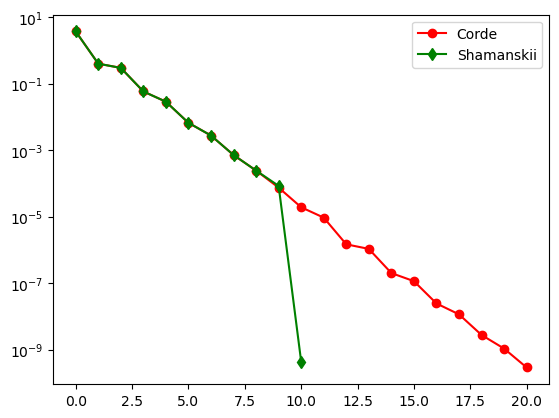

In [47]:
# è stato fatto nella esercitazione 6
# ora li sto provando a fare da solo
fname = lambda x : [ 2*x[0]-math.cos(x[1]), math.sin(x[0])+2*x[1] ]
#x0 = sym.symbols('x0')
#x1 = sym.symbols('x1')

# RICORDA: non puoi usare math.cos se no non ti fa la derivata e ti da
# errore dicendoti che deve fare la conversione di una funzione sconosciuta
# quindi usa sys.cos
#f1 = 2*x0-sym.cos(x1)
#f2 = sym.sin(x0)+2*x1

JacNam = lambda x : np.array([ [2, math.sin(x[1])], [math.cos(x[0]), 2] ]) 
#print(JacNam(1,2))
NMAX = 500
X0=np.array([-1,1])
tolx=1e-10
tolf=1e-10


x1, XmC, nitC = NewtonRaphson_corde(fname, JacNam, X0, tolx, tolf, NMAX)
print("Soluzione approssimata usando il newton con variante corde", x1)
x1, XmS, nitS = NewtonRaphson_sham(fname, JacNam, X0, tolx, tolf, NMAX)
print("Soluzione approssimata usando il newton con variante shamanskii", x1)
print(range(nitS),XmS)
plt.semilogy(range(nitC),XmC,'r-o', range(nitS),XmS,'g-d')
plt.legend(['Corde','Shamanskii'])

## Esercizio 2
Scrivere la function `NewtonRaphson_minimo.py`, che implementa il metodo di Newton-Raphson con la variante delle corde
per il calcolo del minimo assoluto (relativo) di una funzione non lineare.

    Tale function
deve assumere come dati in input:
- grad_name: nome della  funzione vettoriale  che contine il gradiente della funzione di cui calcolare lo zero;
- Hess_name: nome della funzione che calcola l' Hessiana della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.



In [57]:
# è stato fatto nella esercitazione 6
# ora provo a farlo da solo
def NewtonRaphson_minimo (grad_name, Hess_name , f , X0, tolx, tolf, NMAX):
    
    matHess = Hess_name(X0)
    if np.linalg.det(matHess) == 0:
        print("La matrice Hessiana calcolata nell'iterato precedente non è a rango massimo")
        return None, None, None
    grad_fx0= grad_name(X0)    
    # il solve(A,b) ti risolve il sistema lineare Ax=b 
    s = np.linalg.solve(matHess , -1*grad_fx0)
    # Aggiornamento della soluzione
    it = 1
    x1 = X0 + s
    grad_fx1 = grad_name(x1)
    Xm = [np.linalg.norm(s, 1)]
  
    while ( it <= NMAX and (np.linalg.norm(x1 - X0, 1))/(np.linalg.norm(X0, 1)) >= tolx and np.linalg.norm(grad_fx1, 1) >= tolf):
        
        X0 = x1
        it += 1
        matHess = Hess_name(X0)
        grad_fx0=grad_fx1
     
        if np.linalg.det(matHess) == 0:
       
            print("La matrice Hessiana calcolata nell'iterato precedente non è a rango massimo")
            return None, None, None
      
 
        s = np.linalg.solve(matHess , -1*grad_fx0)
     
        # Aggiornamento della soluzione
        x1 = X0 + s

        #Calcolo del gradiente nel nuovo iterato
        grad_fx1  = grad_name(x1)
        print(np.linalg.norm(s, 1))
        Xm.append(np.linalg.norm(s, 1))
    
    # x1 = vettore approssimato dello zero
    # xM = vettore errore relativo tra due iterati successivi
    # it = numero di iterazioni effettuate
    return x1, it, Xm

Calcolare il punto di minimo delle seguenti due funzioni 
   $$\frac{1}{2}(0.001(x-1)^2+(x^2-y)^2)$$
   $$ (x^2 - y^2)^2 + (x - 1)^2$$
   $$sin\left (\frac{x^2}{2}-\frac{y^2}{4}\right)cos(2x-e^y)$$

3.999999999996942
Soluzione approssimata usando il newton per il calcolo punto minimo [1. 1.]
num. it =  2 , errore rel. tra it successivi =  [5.999999999997706, 3.999999999996942]


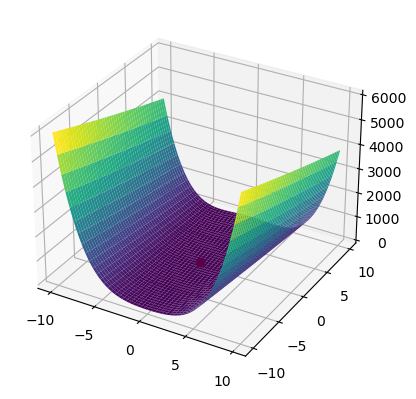

In [58]:
# è stato fatto nella esercitazione 6
# ora li sto provando a fare da solo

fname = lambda x : [ 2*x[0]-math.cos(x[1]), math.sin(x[0])+2*x[1] ]
y = sym.symbols('y')
x = sym.symbols('x')

# RICORDA: non puoi usare math.cos se no non ti fa la derivata e ti da
# errore dicendoti che deve fare la conversione di una funzione sconosciuta
# quindi usa sys.cos
f1 = lambda x : (1/2)*(0.001*(x[0]-1)**2 + (x[0]**2-x[1])**2)

# print(sym.diff(2.0*x*(x**2 - y) + 0.001*x - 0.001,y,1))

grad_name = lambda x : np.array([ 2*x[0]*(x[0]**2 - x[1]) + 0.001*x[0] - 0.001, -1*x[0]**2 + 1*x[1] ])
Hess_name = lambda x : np.array([ [ 6*x[0]**2 - 2.0*x[1] + 0.001, -2*x[0] ],[ -2*x[0], 1 ] ]) 
# ricorda il gradiente è la trasposta del Jacobiano

#print(JacNam(1,2))
x0=np.array([-10,5])
tolx=1e-10
tolf=1e-10
NMAX=100

x1, it, Xm = NewtonRaphson_minimo (grad_name, Hess_name , f1 , X0, tolx, tolf, NMAX)
print("Soluzione approssimata usando il newton per il calcolo punto minimo", x1)
print("num. it = ", it, ", errore rel. tra it successivi = ", Xm)

x = np.arange(-10.0, 10.0, 0.1)
y = np.arange(-10.0, 10.0, 0.1)
X, Y = np.meshgrid(x, y)
Z=0.5*(0.001*(X-1)**2+(X**2-Y)**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis)
plt.plot(0.0,0.0,f1(np.array(x1)),'ro')  #Un pallino nel punto di minimo
# Mostra il grafico
plt.show()

## Esercizio 3
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

In [80]:
# norma 1 è la sommatoria delle righe
# norma infinito è la sommatoria delle colonne

import numpy as np

A = np.array([[2,-3]])
print(A)

n1 = np.linalg.norm(A,1)
print("Norma 1 = ", n1)
n_inf = np.linalg.norm(A, np.inf)
print("Norma infinito = ", n_inf)
n2 = np.linalg.norm(A, 2)
print("Norma 2 (fatta con il metodo esistente) = ", n2)

# La norma 2 di una matrice è la radice quadrata dell'autovalore di modulo massimo di A^T*A
#M = A.T@A
#my_n2 = np.sqrt(np.max(np.abs(np.linalg.eigvals(M))))
#print("Norma 2 (fatta a mano) = ", my_n2)

# l'esercizio richiede di calcolare la norma 1 e infinito senza usare le funzioni già esistenti
#c = np.sum(np.abs(A), axis=0)
#my_n1=np.max(c)
#print("Norma 1 (che abbiamo fatto noi) = ",my_n1)
#c = np.sum(np.abs(A), axis=1)
#my_n_inf=np.max(c)
#print("Norma infinito (che abbiamo fatto noi) = ",my_n_inf)

# RIFATTE CON GIOVA
def norm1(A):
    return np.max(np.sum(np.abs(A), axis=0))

def norminf(A):
    if (np.shape(A)[0] == 1 or np.shape(A)[1] == 1):
        return np.sum(np.abs(A))
    else:
        return np.max(np.sum(np.abs(A), axis=1))

def norm2(A):
    return np.sqrt(np.max(np.linalg.eigvals(A.T@A)))

# calcolo norma 1 somma rispetto alle colonne e prendo il massimo
my_n1 = norm1(A)
print("Norma 1 fatta in casa = ", my_n1)
# calcolo norma inf somma rispetto alle righe e prendo il massimo
my_n_inf = norminf(A)
print("Norma infinito fatta in casa = ", my_n_inf)
# calcolo la norma 2 significa calcolare sotto radice
# il raggio spettrale = massimo autovalore della matrice A.T*A
my_n2 = norm2(A)
print("Norma 2 fatta in casa = ", my_n2)

[[ 2 -3]]
Norma 1 =  3.0
Norma infinito =  5.0
Norma 2 (fatta con il metodo esistente) =  3.6055512754639896
Norma 1 fatta in casa =  3
Norma infinito fatta in casa =  5
Norma 2 fatta in casa =  3.6055512754639896


## Esercizio 4
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg